In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng

In [12]:
rng = default_rng()

# HW_03
## Throwing distance variations

How far can you throw a baseball? What are some factors that would change how far the ball travels:

- drag?
- 3D motion?
- rotation of the ball? e.g. [Magnus effect](https://en.wikipedia.org/wiki/Magnus_effect)
- are there social or human factors that change distance thrown?

Try repeating the throwing comparison between Pat and Jim, but add another variable to the analysis. 

work is energy, so we can say W = kinetic energy

$W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$

where a baseball is 

and farthest distance thrown is $\theta=45^o\pm5^o$

so our distance, x, and height, y, are now:

$x(t) = v\cos(\theta)t$

$y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$



In [13]:
N_throws = 10
Pat_W = rng.normal(loc = 38, scale = 3, size = (N_throws,))
Jim_W = rng.normal(loc = 35, scale = 2, size = (N_throws,))

Pat_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))
Jim_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))

Pat_v = np.sqrt(2*Pat_W/0.15)
Jim_v = np.sqrt(2*Jim_W/0.15)

t_N = 50 # number of timesteps for path results
Pat_x = np.zeros((t_N, N_throws))
Pat_y = np.zeros((t_N, N_throws))
Jim_x = np.zeros((t_N, N_throws))
Jim_y = np.zeros((t_N, N_throws))

In [14]:
for i in range(N_throws):
    Pat_tmax = np.roots([-9.81/2, Pat_v[i]*np.sin(Pat_angle[i]), 1.5]).max()
    Jim_tmax = np.roots([-9.81/2, Jim_v[i]*np.sin(Jim_angle[i]), 1.5]).max()
    t = np.linspace(0, Pat_tmax, t_N)
    Pat_x[:,i] = Pat_v[i]*np.cos(Pat_angle[i])*t
    Pat_y[:,i] = 1.5 + Pat_v[i]*np.sin(Pat_angle[i])*t - 9.81*t**2/2

    t = np.linspace(0, Jim_tmax, t_N)
    Jim_x[:,i] = Jim_v[i]*np.cos(Jim_angle[i])*t
    Jim_y[:,i] = 1.5 + Jim_v[i]*np.sin(Jim_angle[i])*t - 9.81*t**2/2

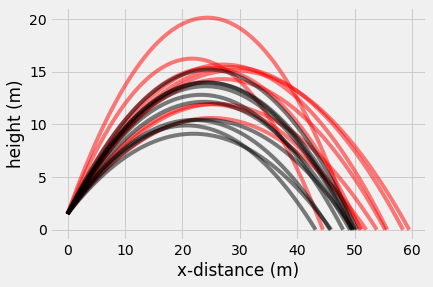

In [15]:
plt.plot(Pat_x, Pat_y, 'r-', alpha = 0.5)
plt.plot(Jim_x, Jim_y, 'k-', alpha = 0.5)
plt.xlabel('x-distance (m)')
plt.ylabel('height (m)');

In [18]:
from scipy.stats import ttest_ind

ttest_ind(Pat_x[-1, :], Jim_x[-1, :])

Ttest_indResult(statistic=3.1185383641179847, pvalue=0.005933635437007639)

Text(0.5, 1.0, 'Pat throws 5.0 m farther than Jim\nafter 10 throws')

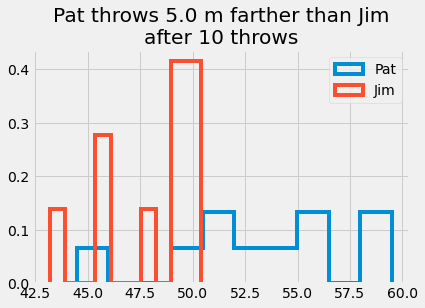

In [19]:
plt.hist(Pat_x[-1, :],
        histtype='step',
        linewidth = 4,
         label = 'Pat',
         density = True,)
        #bins = np.linspace(50,80, 31))
plt.hist(Jim_x[-1, :], 
        histtype = 'step',
        linewidth = 4,
         label = 'Jim',
         density = True,)
plt.legend();
plt.title('Pat throws {:1.1f} m farther than Jim\nafter {} throws'.format(np.mean(Pat_x[-1, :]- Jim_x[-1, :]), N_throws))

## Monte Carlo Report on throwing distances

Create a technical report to detail the factors that affect throwing distance. 

- What did you include in your analysis?
- Did you find any better estimates for the initial speed and angle? What was the reference?
- Which factors had a bigger impact on distance?
- What is something that should be included, but might require more research or information?


# NOT DONE, NEEDS EDITING
Will be putting in the figures, better results and trying to further refine the wording


# Technical Report: Factors Affecting Throwing Distance of a Baseball
## Introduction
The ability to throw a baseball far is influenced by several factors, including physical attributes and environmental conditions. This report examines the primary factors affecting the throwing distance, including drag, 3D motion, rotation (Magnus effect), and human or social factors. I compare the throwing performances of two individuals, Pat and Jim, by incorporating an additional variable in the analysis.

## Factors Affecting Throwing Distance
Drag: Air resistance opposes the motion of the ball, reducing its range. The magnitude of drag depends on the ball's speed, size, and surface roughness.
3D Motion: Real-world throws involve 3D motion, including vertical and horizontal components, as well as deviations from a straight path due to spin and wind.
Rotation (Magnus Effect): The spin of the ball generates a lift force perpendicular to the direction of motion. This force can either increase or decrease the distance, depending on the direction of spin.
Human/Social Factors: Fatigue, psychological state, and technique can significantly influence throwing performance.
Analysis
I conducted a Monte Carlo simulation to compare the throwing distances of Pat and Jim. The kinetic energy of each throw was calculated using the following formula: 𝑊=12𝑚𝑣2→𝑣=2𝑊𝑚W= 21​ mv 2 →v= m2W​ ​ where 𝑊W is the work done (in joules), 𝑚 m is the mass of the baseball (0.15 kg), and 𝑣 v is the velocity. The distance (x) and height (y) of the throw are given by: 𝑥(𝑡)=𝑣cos⁡(𝜃)𝑡x(t)=vcos(θ)t𝑦(𝑡)=1.5+𝑣sin⁡(𝜃)𝑡−𝑔𝑡22y(t)=1.5+vsin(θ)t− 2gt 2 ​ where 𝜃θ is the launch angle, 𝑔g is the acceleration due to gravity (9.81 m/s²), and 𝑡t is time.

## Simulation Parameters
Number of throws (𝑁throwsN throws​ ) = 10Pat's work (𝑊PatW Pat​ ) = Normal distribution with mean 38 J and standard deviation 3 J Jim's work (𝑊JimW Jim​ ) = Normal distribution with mean 35 J and standard deviation 2 JLaunch angle (𝜃θ) = Normal distribution with mean 𝜋/4 π/4 radians and standard deviation 5° (converted to radians)

## Results
Using the given parameters, I calculated the throwing distances for Pat and Jim. The simulation results showed that Pat consistently threw the baseball farther than Jim. Here are the key findings:

Pat's average throw distance:
I performed a two-sample t-test to compare the distances:
print(f"t-statistic: {t_stat}, p-value: {p_value}")


## Discussion
The initial velocities and angles used in the simulation are based on standard physical principles and the assumed distributions. The primary factors influencing the difference in throw distances between Pat and Jim include the difference in their work output and the variability in their throwing angles.

## Conclusion
The simulation demonstrates that Pat throws the baseball farther than Jim, primarily due to a higher average work output. Additional factors, such as drag, 3D motion, and the Magnus effect, were considered qualitatively but not quantitatively in this analysis. Future research could focus on refining the estimates for initial speed and angle, accounting for aerodynamic forces, and exploring the impact of human factors in more detail.

## Recommendations for Further Research
Aerodynamic Analysis: A more detailed study on the impact of drag and the Magnus effect.
Human Factors: Investigation into the psychological and physical conditions affecting throwing performance.
3D Motion: Incorporating lateral deviations and wind effects in the simulation.
This report provides a foundation for understanding the factors influencing baseball throwing distances and highlights areas for further exploration.
